In [5]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

In [1]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Buket
[nltk_data]     Fildisi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
stop_words.extend(['greenstoneplus','Source','Resources','Links'])

In [6]:
df= pd.read_excel('C:/Users/Buket Fildisi/Desktop/BCU/Dissertation/DEV/DATA/ExecutiveSumPfs_Parag.xlsx')
df.head()

,Unnamed: 0,Context
0,0,x international monetary fund | april 2020 exe...
1,1,international monetary fund | april 2020 xito...
2,2,international monetary fund | april 2018 xith...
3,3,xii international monetary fund | april 2018 g...
4,4,x international monetary fund | october 2017 n...


In [22]:
stop_words[0:]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
len(df)

166

In [23]:
df=df.drop(df.columns[0], axis=1)
df

,Context
0,x international monetary fund | april 2020 exe...
1,international monetary fund | april 2020 xito ...
2,international monetary fund | april 2018 xithe...
3,xii international monetary fund | april 2018 g...
4,x international monetary fund | october 2017 n...
...,...
159,setting stage robust global financial system i...
160,executive summary border cross-functional regu...
161,executive summary valuation reserves adjustmen...
162,executive summary settle across borders multip...


In [20]:
df=df.dropna().reset_index()
len(df)

164

In [21]:
df

,index,Context
0,0,x international monetary fund | april 2020 exe...
1,1,international monetary fund | april 2020 xito...
2,2,international monetary fund | april 2018 xith...
3,3,xii international monetary fund | april 2018 g...
4,4,x international monetary fund | october 2017 n...
...,...,...
159,161,setting the stage for a more robust global fin...
160,162,executive summary border and cross-functiona...
161,163,executive summary to valuation reserves or a...
162,164,executive summary settle across borders and ...


In [22]:
df['Context']=df['Context'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop_words)]))
df

,index,Context
0,0,x international monetary fund | april 2020 exe...
1,1,international monetary fund | april 2020 xito ...
2,2,international monetary fund | april 2018 xithe...
3,3,xii international monetary fund | april 2018 g...
4,4,x international monetary fund | october 2017 n...
...,...,...
159,161,setting stage robust global financial system i...
160,162,executive summary border cross-functional regu...
161,163,executive summary valuation reserves adjustmen...
162,164,executive summary settle across borders multip...


In [24]:
df_list=df["Context"].values.tolist()
df_list

['x international monetary fund | april 2020 executive summary coronavirus (covid-19) pandemic presents historic challenge. mid-february, market participants started fear outbreak would become global pandemic, prices equities fell sharply, previously overstretched levels. credit markets, spreads skyrocketed, especially risky segments high-yield bonds, leveraged loans, private debt, issuance essentially came halt. oil prices plummeted face weakening global demand failure opec+ countries reach agreement output cuts, adding leg deterioration risk appetite. volatile market conditions led flight quality, yields safe-haven bonds declining abruptly. number factors amplified asset price moves, contributing sharp tightening financial conditions unprecedented speed. signs strain emerged major short-term funding markets, including global market us dollars—a development reminiscent dynamics last seen financial crisis decade ago. market liquidity deteriorated considerably, including markets traditi

In [25]:
import string
import re
def text_clean_1(text):
    text = text.lower()
    text= text.replace(".  ",".");
    text= text.replace("'  ',","");
    text= text.replace(" '","'");
    text= text.replace("  ","");
    text= text.replace("•","");
    text=re.sub('\[\' ','',text)
    text=re.sub('\[\'','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    return text

In [26]:
text_clean_1(df_list[3])

'xii international monetary fund  april 2018 global financial stability report bumpy road aheadthe technology behind crypto assets potential make financial market infrastructure efficient however crypto assets afflicted fraud security breaches operational failures associated illicit activities present crypto assets appear pose financial stability risks could use become widespread without appropriate safeguards chapter 2 takes comprehensive look evolution riskiness corporate credit allocation given concerns continued search higher yield may led banks investors extend much credit risky borrowers chapter documents pattern firms obtaining credit relatively riskier periods strong credit expansion especially lending standards loose financial conditions easy increase riskiness credit allocation signals heightened downside risks gdp growth higher probability banking stress addition previously documented signals provided credit growth country authorities use measures introduced chapter monitor 

In [27]:
len(df_list)

164

In [28]:
doc=[]
for i in range(len(df_list)):
    doc.append(text_clean_1(df_list[i]))
doc


['x international monetary fund  april 2020 executive summary coronavirus covid19 pandemic presents historic challenge midfebruary market participants started fear outbreak would become global pandemic prices equities fell sharply previously overstretched levels credit markets spreads skyrocketed especially risky segments highyield bonds leveraged loans private debt issuance essentially came halt oil prices plummeted face weakening global demand failure opec countries reach agreement output cuts adding leg deterioration risk appetite volatile market conditions led flight quality yields safehaven bonds declining abruptly number factors amplified asset price moves contributing sharp tightening financial conditions unprecedented speed signs strain emerged major shortterm funding markets including global market us dollars—a development reminiscent dynamics last seen financial crisis decade ago market liquidity deteriorated considerably including markets traditionally seen deep leveraged in

In [29]:
type(doc)

list

In [30]:
doc[1]

'international monetary fund  april 2020 xito end authorities across globe already implemented wideranging policies april 2020 fiscal monitor describes fiscal support packages announced governments across globe large timely temporary targeted fiscal measures necessary ensure temporary shutdown activity lead permanent damage productive capacity economy society whole central banks globally taken bold decisive actions easing monetary policy purchasing range assets providing liquidity financial system effort lean tightening financial conditions maintain flow credit economy policy rates near zero many major advanced economies unconventional measures forward guidance expected policy path becoming main tools central banks going forward central banks may also consider measures support economy challenging times policymakers need maintain balance safeguarding financial stability supporting economic activity banks first instance banks’ existing capital liquidity buffers used absorb losses funding

In [31]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  
        # deacc=True removes punctuations

data_words = list(sent_to_words(doc))

print(data_words[:1])

[['international', 'monetary', 'fund', 'april', 'executive', 'summary', 'coronavirus', 'covid', 'pandemic', 'presents', 'historic', 'challenge', 'midfebruary', 'market', 'participants', 'started', 'fear', 'outbreak', 'would', 'become', 'global', 'pandemic', 'prices', 'equities', 'fell', 'sharply', 'previously', 'overstretched', 'levels', 'credit', 'markets', 'spreads', 'skyrocketed', 'especially', 'risky', 'segments', 'highyield', 'bonds', 'leveraged', 'loans', 'private', 'debt', 'issuance', 'essentially', 'came', 'halt', 'oil', 'prices', 'plummeted', 'face', 'weakening', 'global', 'demand', 'failure', 'opec', 'countries', 'reach', 'agreement', 'output', 'cuts', 'adding', 'leg', 'deterioration', 'risk', 'appetite', 'volatile', 'market', 'conditions', 'led', 'flight', 'quality', 'yields', 'safehaven', 'bonds', 'declining', 'abruptly', 'number', 'factors', 'amplified', 'asset', 'price', 'moves', 'contributing', 'sharp', 'tightening', 'financial', 'conditions', 'unprecedented', 'speed', '

In [32]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(doc, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[doc], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['international', 'monetary', 'fund', 'april', 'executive', 'summary', 'coronavirus', 'covid', 'pandemic', 'presents', 'historic', 'challenge', 'midfebruary', 'market', 'participants', 'started', 'fear', 'outbreak', 'would', 'become', 'global', 'pandemic', 'prices', 'equities', 'fell', 'sharply', 'previously', 'overstretched', 'levels', 'credit', 'markets', 'spreads', 'skyrocketed', 'especially', 'risky', 'segments', 'highyield', 'bonds', 'leveraged', 'loans', 'private', 'debt', 'issuance', 'essentially', 'came', 'halt', 'oil', 'prices', 'plummeted', 'face', 'weakening', 'global', 'demand', 'failure', 'opec', 'countries', 'reach', 'agreement', 'output', 'cuts', 'adding', 'leg', 'deterioration', 'risk', 'appetite', 'volatile', 'market', 'conditions', 'led', 'flight', 'quality', 'yields', 'safehaven', 'bonds', 'declining', 'abruptly', 'number', 'factors', 'amplified', 'asset', 'price', 'moves', 'contributing', 'sharp', 'tightening', 'financial', 'conditions', 'unprecedented', 'speed', 's

In [33]:
# Define functions for bigrams, trigrams and lemmatization
import io
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [34]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load("en_core_web_sm")

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['international', 'monetary', 'summary', 'coronavirus', 'covid', 'present', 'historic', 'challenge', 'midfebruary', 'market', 'participant', 'start', 'fear', 'outbreak', 'become', 'global', 'pandemic', 'price', 'equity', 'fall', 'sharply', 'previously', 'overstretch', 'level', 'credit', 'market', 'spread', 'skyrocket', 'especially', 'risky', 'segment', 'highyield', 'bond', 'leverage', 'loan', 'private', 'debt', 'issuance', 'essentially', 'come', 'halt', 'oil', 'price', 'plummet', 'face', 'weaken', 'global', 'demand', 'failure', 'opec', 'country', 'reach', 'agreement', 'output', 'cut', 'add', 'leg', 'deterioration', 'risk', 'appetite', 'volatile', 'market', 'condition', 'lead', 'flight', 'quality', 'yield', 'safehaven', 'bond', 'decline', 'abruptly', 'number', 'factor', 'amplify', 'asset', 'price', 'move', 'contribute', 'sharp', 'tighten', 'financial', 'condition', 'unprecedented', 'speed', 'sign', 'strain', 'emerge', 'major', 'shortterm', 'funding', 'market', 'include', 'global', 'mar

In [35]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 4), (12, 1), (13, 1), (14, 3), (15, 1), (16, 1), (17, 2), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 3), (27, 3), (28, 3), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 3), (37, 3), (38, 3), (39, 1), (40, 3), (41, 2), (42, 1), (43, 5), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 2), (55, 1), (56, 4), (57, 4), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 2), (65, 1), (66, 1), (67, 1), (68, 4), (69, 1), (70, 1), (71, 2), (72, 1), (73, 1), (74, 9), (75, 1), (76, 2), (77, 1), (78, 2), (79, 2), (80, 1), (81, 1), (82, 3), (83, 1), (84, 2), (85, 1), (86, 1), (87, 7), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 2), (94, 1), (95, 2), (96, 1), (97, 2), (98, 2), (99, 2), (100, 1), (101, 1), (102, 1), (103, 3), (104, 1), (105, 1), (106, 1), (107, 2), (108, 2), (109, 1), (110, 2)

In [36]:
id2word[0]

'abruptly'

In [37]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('abruptly', 1),
  ('action', 1),
  ('activity', 1),
  ('add', 1),
  ('affect', 2),
  ('ago', 1),
  ('agreement', 1),
  ('aim', 1),
  ('amplify', 2),
  ('appetite', 1),
  ('appropriate', 1),
  ('asset', 4),
  ('authority', 1),
  ('avoid', 1),
  ('bank', 3),
  ('become', 1),
  ('blow', 1),
  ('bond', 2),
  ('borrow', 2),
  ('borrower', 1),
  ('call', 1),
  ('capital', 1),
  ('cause', 1),
  ('central', 1),
  ('challenge', 2),
  ('close', 1),
  ('come', 3),
  ('company', 3),
  ('condition', 3),
  ('considerably', 1),
  ('contain', 1),
  ('containment', 1),
  ('contribute', 1),
  ('cooperation', 1),
  ('coronavirus', 1),
  ('cost', 1),
  ('country', 3),
  ('covid', 3),
  ('credit', 3),
  ('creditworthy', 1),
  ('crisis', 3),
  ('cut', 2),
  ('deal', 1),
  ('debt', 5),
  ('decade', 1),
  ('decisive', 1),
  ('decline', 1),
  ('deep', 1),
  ('demand', 1),
  ('deteriorate', 1),
  ('deterioration', 1),
  ('development', 1),
  ('discuss', 1),
  ('distress', 1),
  ('dollar', 2),
  ('dynamic', 1

In [59]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=32,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [60]:
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(16, '0.000*"risk" + 0.000*"asset" + 0.000*"financial" + 0.000*"bank" + 0.000*"fund" + 0.000*"stability" + 0.000*"investment" + 0.000*"pose" + 0.000*"policymaker" + 0.000*"management"'), (6, '0.000*"market" + 0.000*"risk" + 0.000*"financial" + 0.000*"increase" + 0.000*"director" + 0.000*"year" + 0.000*"emerge" + 0.000*"note" + 0.000*"bond" + 0.000*"yield"'), (13, '0.000*"policy" + 0.000*"market" + 0.000*"capital" + 0.000*"financial" + 0.000*"include" + 0.000*"director" + 0.000*"climate" + 0.000*"risk" + 0.000*"private" + 0.000*"sector"'), (3, '0.000*"market" + 0.000*"emerge" + 0.000*"bank" + 0.000*"private" + 0.000*"real" + 0.000*"price" + 0.000*"source" + 0.000*"capital" + 0.000*"policy" + 0.000*"developer"'), (7, '0.000*"market" + 0.000*"director" + 0.000*"financial" + 0.000*"emerge" + 0.000*"investor" + 0.000*"bank" + 0.000*"risk" + 0.000*"global" + 0.000*"note" + 0.000*"country"'), (15, '0.000*"market" + 0.000*"risk" + 0.000*"financial" + 0.000*"director" + 0.000*"emerge" + 0.000*

In [61]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.496043255971465

Coherence Score:  0.3815839640586277


In [62]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\Buket Fildisi\anaconda3\Lib\site-packages\pyLDAvis\_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.289272 -0.031125       1        1  51.592851
22    -0.361664 -0.034681       2        1  23.892366
9     -0.325757  0.082415       3        1   8.496034
20    -0.319259 -0.082169       4        1   8.363194
18    -0.073499  0.294027       5        1   1.899518
12    -0.166776 -0.117378       6        1   1.681520
1     -0.061015 -0.066690       7        1   0.845810
8     -0.026846  0.150349       8        1   0.762246
25    -0.004551  0.019009       9        1   0.697212
19     0.014876  0.046081      10        1   0.609525
23     0.088880 -0.055172      11        1   0.284183
26     0.035794 -0.032085      12        1   0.262380
28     0.094832 -0.017114      13        1   0.121191
29     0.093350 -0.012992      14        1   0.101814
0      0.093415 -0.014560      15        1   0.097071
14     0.088601 -0.012610      16        1   0.087562
30     0.079435 -0.011591      17        1   0.053054
4      0.079347 -0.010587      18        1   0.051556
24     0.075204 -0.008651      19        1   0.030140
21     0.070460 -0.007519      20        1   0.015687
11     0.067581 -0.006401      21        1   0.005007
2      0.067781 -0.006417      22        1   0.004930
31     0.067810 -0.006411      23        1   0.004882
17     0.067754 -0.006437      24        1   0.004839
27     0.067848 -0.006426      25        1   0.004705
10     0.067880 -0.006426      26        1   0.004610
15     0.067944 -0.006398      27        1   0.004437
7      0.067969 -0.006401      28        1   0.004425
13     0.067952 -0.006410      29        1   0.004375
3      0.067955 -0.006415      30        1   0.004371
6      0.067984 -0.006407      31        1   0.004319
16     0.067986 -0.006409      32        1   0.004186, topic_info=            Term         Freq        Total Category  logprob  loglift
74     financial  1004.000000  1004.000000  Default  30.0000  30.0000
118       market  1237.000000  1237.000000  Default  29.0000  29.0000
87        global   466.000000   466.000000  Default  28.0000  28.0000
170         risk   877.000000   877.000000  Default  27.0000  27.0000
21       capital   333.000000   333.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
727  supervision     0.000451    35.712420  Topic32  -8.4672  -1.1982
212         well     0.000451   154.371863  Topic32  -8.4673  -2.6621
112    liquidity     0.000451   292.904867  Topic32  -8.4673  -3.3026
38        credit     0.000451   365.231030  Topic32  -8.4673  -3.5233
391      concern     0.000451    98.950178  Topic32  -8.4673  -2.2174

[2173 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
3014      3  0.989876       abate
2118      4  0.982822        able
553       2  0.945169      abrupt
2518      8  0.612938    abundant
3189      5  1.001990  acceptable
...     ...       ...         ...
1746      2  0.726160          yr
1746      7  0.242053          yr
1107      1  0.276509         ﬁrm
1107      4  0.691272         ﬁrm
2001      3  0.964985         ﬂow

[1565 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 23, 10, 21, 19, 13, 2, 9, 26, 20, 24, 27, 29, 30, 1, 15, 31, 5, 25, 22, 12, 3, 32, 18, 28, 11, 16, 8, 14, 4, 7, 17])

In [43]:
#How to find optimal number of topic


In [44]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics)
        #gensim.models.wrappers.LdaMallet( corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [45]:
# Takes a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

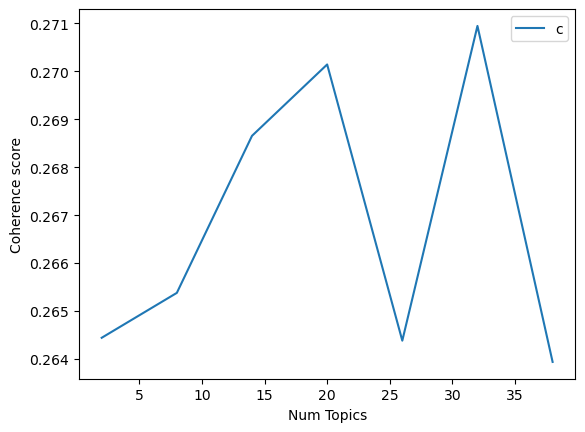

In [46]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [47]:
#If the coherence score seems to keep increasing, 
#it may make better sense to pick the model that gave the highest CV before flattening out.
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2644
Num Topics = 8  has Coherence Value of 0.2654
Num Topics = 14  has Coherence Value of 0.2687
Num Topics = 20  has Coherence Value of 0.2701
Num Topics = 26  has Coherence Value of 0.2644
Num Topics = 32  has Coherence Value of 0.2709
Num Topics = 38  has Coherence Value of 0.2639


In [48]:
# Select the model and print the topics
optimal_model = model_list[5]
model_topics = optimal_model.show_topics(formatted=False)
print(optimal_model.print_topics(num_words=10))

[(30, '0.012*"bank" + 0.012*"policy" + 0.012*"market" + 0.008*"financial" + 0.008*"risk" + 0.007*"country" + 0.007*"need" + 0.007*"global" + 0.006*"measure" + 0.006*"asset"'), (24, '0.022*"financial" + 0.021*"bank" + 0.016*"global" + 0.015*"market" + 0.010*"risk" + 0.008*"economy" + 0.008*"system" + 0.007*"rate" + 0.007*"policy" + 0.006*"asset"'), (18, '0.022*"financial" + 0.019*"market" + 0.013*"risk" + 0.013*"bank" + 0.009*"emerge" + 0.009*"policy" + 0.009*"economy" + 0.008*"global" + 0.008*"sector" + 0.007*"capital"'), (20, '0.018*"market" + 0.010*"risk" + 0.009*"emerge" + 0.009*"financial" + 0.008*"bank" + 0.008*"credit" + 0.008*"director" + 0.008*"capital" + 0.007*"sector" + 0.007*"policy"'), (0, '0.012*"market" + 0.007*"credit" + 0.007*"risk" + 0.007*"bank" + 0.006*"asset" + 0.005*"increase" + 0.004*"policy" + 0.004*"country" + 0.004*"emerge" + 0.004*"capital"'), (15, '0.022*"financial" + 0.020*"risk" + 0.020*"market" + 0.016*"bank" + 0.014*"policy" + 0.010*"global" + 0.008*"cond

In [49]:
visOpt = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
visOpt
#we can see the optimal topic number 

C:\Users\Buket Fildisi\anaconda3\Lib\site-packages\pyLDAvis\_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
16    -0.016444 -0.002149       1        1  22.136744
14    -0.027478  0.013508       2        1  15.135135
17    -0.024402  0.000559       3        1  12.843175
10    -0.021389 -0.005681       4        1  10.347285
27    -0.025091  0.009060       5        1   7.438044
2     -0.030822 -0.012767       6        1   7.197768
22    -0.018399 -0.015314       7        1   5.048268
12    -0.021715 -0.007189       8        1   4.520906
23    -0.022224  0.003508       9        1   2.228525
18    -0.017412  0.008300      10        1   2.186429
15    -0.022965  0.007608      11        1   1.982658
8      0.001855  0.001020      12        1   1.684012
3     -0.009543 -0.028100      13        1   1.516576
31    -0.003394 -0.004289      14        1   0.829295
21    -0.003540  0.029715      15        1   0.743300
24    -0.012375  0.020874      16        1   0.724034
4      0.022040  0.015351      17        1   0.525396
20     0.028305 -0.026907      18        1   0.515863
25    -0.015285  0.002815      19        1   0.510076
29     0.020366 -0.007367      20        1   0.482174
26    -0.001015  0.000647      21        1   0.439927
28    -0.000732 -0.004459      22        1   0.387614
1      0.011614 -0.006350      23        1   0.149663
7      0.008005  0.026169      24        1   0.125757
13     0.030377 -0.044966      25        1   0.101848
5      0.024183 -0.024434      26        1   0.070479
19     0.013567  0.012234      27        1   0.065527
9      0.002334  0.001502      28        1   0.023784
11    -0.001630  0.003869      29        1   0.009934
6      0.008865 -0.004138      30        1   0.009934
30     0.032669  0.017244      31        1   0.009934
0      0.091674  0.020125      32        1   0.009934, topic_info=          Term         Freq        Total Category  logprob  loglift
118     market  1260.000000  1260.000000  Default  30.0000  30.0000
74   financial  1036.000000  1036.000000  Default  29.0000  29.0000
170       risk   816.000000   816.000000  Default  28.0000  28.0000
14        bank   625.000000   625.000000  Default  27.0000  27.0000
144     policy   564.000000   564.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
87      global     0.015324   429.268130  Topic32  -5.8059  -1.0235
74   financial     0.015767  1036.697325  Topic32  -5.7774  -1.8767
299       many     0.010720   124.548357  Topic32  -6.1632  -0.1434
223       also     0.010960   197.842249  Topic32  -6.1411  -0.5840
56     economy     0.011497   410.686108  Topic32  -6.0933  -1.2666

[2409 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
835       1  0.232218     ability
835       2  0.165870     ability
835       3  0.099522     ability
835       4  0.199044     ability
835       5  0.066348     ability
...     ...       ...         ...
1107      7  0.081655         ﬁrm
1107      8  0.081655         ﬁrm
1178      6  0.488135  ﬁrmsfigure
1747      1  0.299877         ﬁve
1747      7  0.299877         ﬁve

[4343 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[17, 15, 18, 11, 28, 3, 23, 13, 24, 19, 16, 9, 4, 32, 22, 25, 5, 21, 26, 30, 27, 29, 2, 8, 14, 6, 20, 10, 12, 7, 31, 1])

In [63]:
#to find dominant topic in each doc
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_lemmatized):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data_lemmatized)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

C:\Users\Buket Fildisi\AppData\Local\Temp\ipykernel_21324\1719133165.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\Buket Fildisi\AppData\Local\Temp\ipykernel_21324\1719133165.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\Buket Fildisi\AppData\Local\Temp\ipykernel_21324\1719133165.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,14,0.9972,"financial, market, risk, economy, bank, emerge...","[international, monetary, summary, coronavirus..."
1,1,14,0.8949,"financial, market, risk, economy, bank, emerge...","[international, monetary, authority, already, ..."
2,2,15,0.9974,"financial, risk, market, bank, policy, global,...","[international, monetary, economic, outlook, c..."
3,3,14,0.9516,"financial, market, risk, economy, bank, emerge...","[international, report, road, technology, cryp..."
4,4,2,0.6486,"market, financial, policy, risk, bank, economy...","[international, monetary, fund, nearterm, risk..."
5,5,14,0.4565,"financial, market, risk, economy, bank, emerge...","[international, monetary, stall, elsewhere, em..."
6,6,17,0.4924,"financial, market, risk, policy, sector, bank,...","[international, global, financial, report, gro..."
7,7,21,0.9867,"bank, financial, policy, risk, market, global,...","[international, monetary, signal, risk, medium..."
8,8,2,0.9969,"market, financial, policy, risk, bank, economy...","[international, monetary, summary, financial, ..."
9,9,16,0.4494,"market, financial, risk, bank, policy, emerge,...","[global, financial, report, low, great, relian..."


In [64]:
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,14,0.9972,"financial, market, risk, economy, bank, emerge...","[international, monetary, summary, coronavirus..."
1,1,14,0.8949,"financial, market, risk, economy, bank, emerge...","[international, monetary, authority, already, ..."
2,2,15,0.9974,"financial, risk, market, bank, policy, global,...","[international, monetary, economic, outlook, c..."
3,3,14,0.9516,"financial, market, risk, economy, bank, emerge...","[international, report, road, technology, cryp..."
4,4,2,0.6486,"market, financial, policy, risk, bank, economy...","[international, monetary, fund, nearterm, risk..."
...,...,...,...,...,...
159,159,16,0.9971,"market, financial, risk, bank, policy, emerge,...","[set, stage, robust, global, financial, system..."
160,160,16,0.4677,"market, financial, risk, bank, policy, emerge,...","[executive, summary, border, crossfunctional, ..."
161,161,23,0.5433,"financial, market, risk, global, policy, liqui...","[executive, summary, valuation, reserve, adjus..."
162,162,21,0.9910,"bank, financial, policy, risk, market, global,...","[executive, summary, settle, border, multiple,..."


In [65]:
df_dominant_topic.to_excel('C:/Users/Buket Fildisi/Desktop/BCU/Dissertation/DEV/DATA/Results/ExecSum_paragraph.xlsx')

In [66]:
#Topic Distribution 
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,14,"financial, market, risk, economy, bank, emerge...",1.0,0.0061
1,14,"financial, market, risk, economy, bank, emerge...",1.0,0.0061
2,15,"financial, risk, market, bank, policy, global,...",12.0,0.0732
3,14,"financial, market, risk, economy, bank, emerge...",3.0,0.0183
4,2,"market, financial, policy, risk, bank, economy...",NaN,NaN
...,...,...,...,...
159,16,"market, financial, risk, bank, policy, emerge,...",NaN,NaN
160,16,"market, financial, risk, bank, policy, emerge,...",NaN,NaN
161,23,"financial, market, risk, global, policy, liqui...",NaN,NaN
162,21,"bank, financial, policy, risk, market, global,...",NaN,NaN


In [67]:
d = df_dominant_topics['Topic_Keywords'].tolist()
wordclouddeneme= ' '.join(map(str, d)) 
wordclouddeneme

'financial, market, risk, economy, bank, emerge, capital, global, policy, liquidity financial, market, risk, economy, bank, emerge, capital, global, policy, liquidity financial, risk, market, bank, policy, global, condition, country, economy, growth financial, market, risk, economy, bank, emerge, capital, global, policy, liquidity market, financial, policy, risk, bank, economy, emerge, global, sector, debt financial, market, risk, economy, bank, emerge, capital, global, policy, liquidity financial, market, risk, policy, sector, bank, need, growth, economy, emerge bank, financial, policy, risk, market, global, need, institution, credit, crisis market, financial, policy, risk, bank, economy, emerge, global, sector, debt market, financial, risk, bank, policy, emerge, asset, need, credit, country financial, market, risk, policy, sector, bank, need, growth, economy, emerge financial, market, risk, policy, sector, bank, need, growth, economy, emerge market, risk, financial, bank, policy, eme

In [68]:
from wordcloud import WordCloud, STOPWORDS

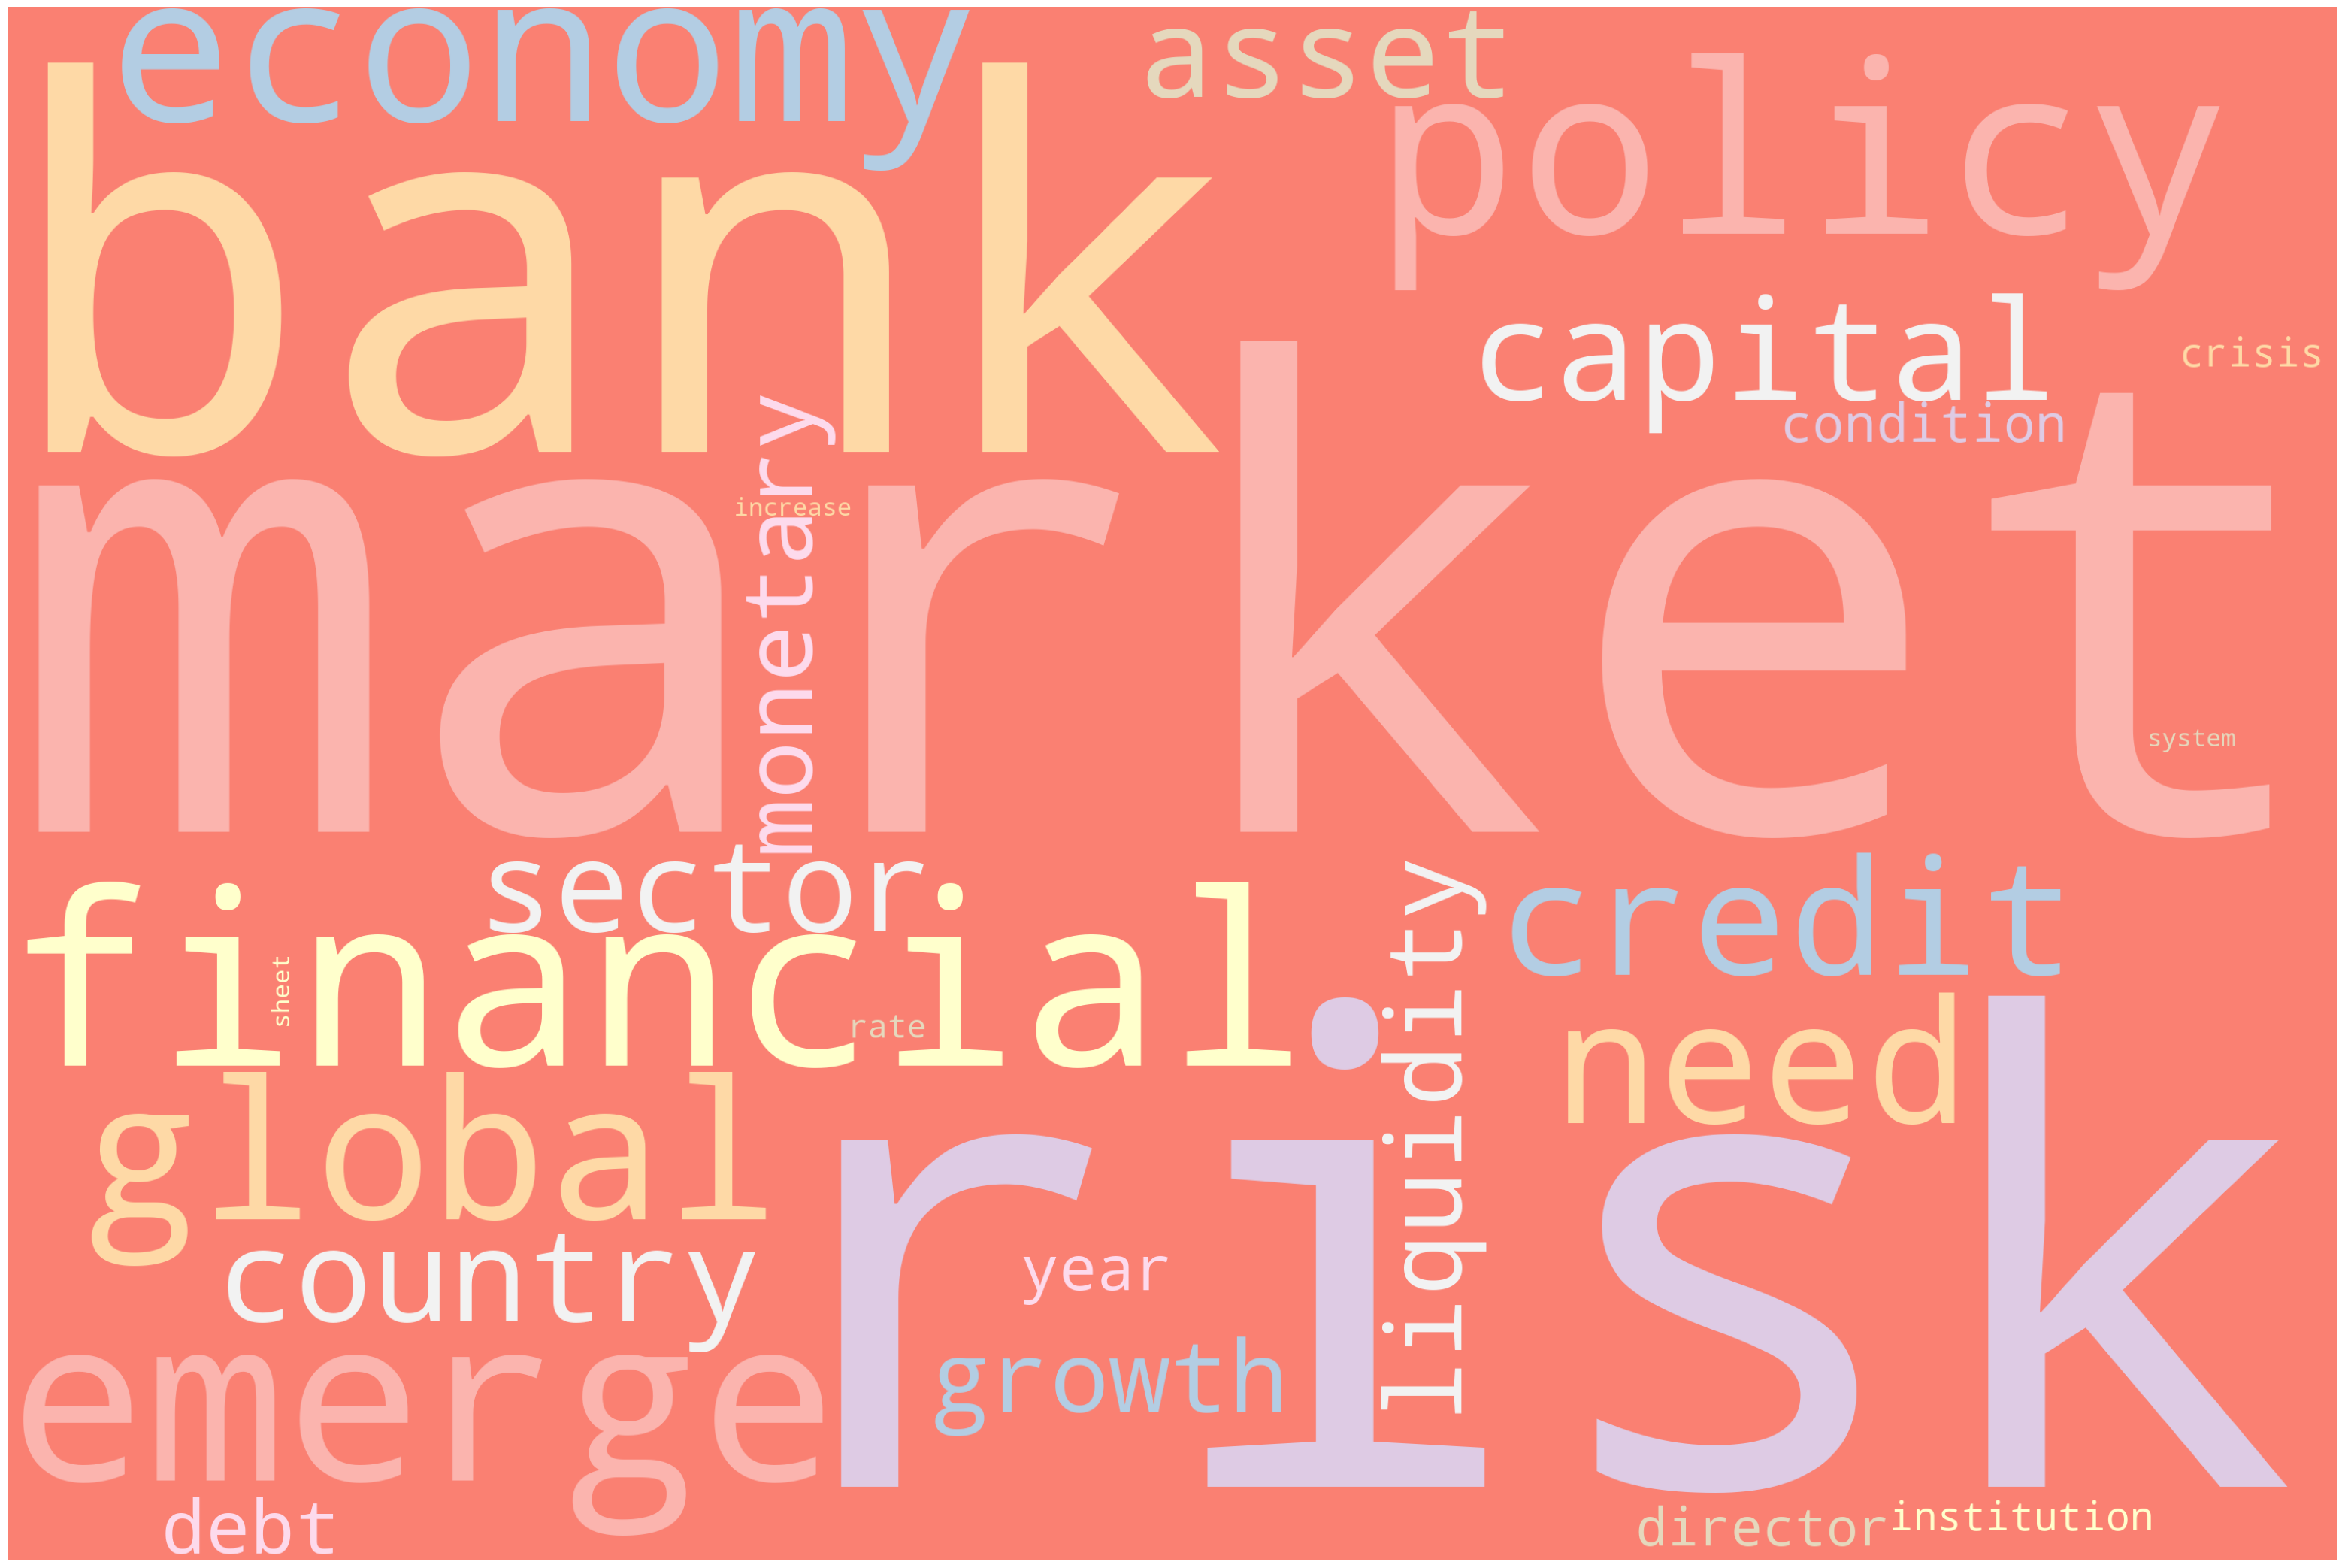

In [69]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")
# Import package

# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = stop_words).generate(wordclouddeneme)
# Plot
plot_cloud(wordcloud)

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
y=df_dominant_topic['Keywords'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])
print(y)
keywords_list = [keyword for sublist in y for keyword in sublist]
print(keywords_list)
# Count the occurrences of each keyword
keyword_counts = pd.Series(keywords_list).value_counts()
print(keyword_counts)

0      [financial, market, risk, economy, bank, emerg...
1      [financial, market, risk, economy, bank, emerg...
2      [financial, risk, market, bank, policy, global...
3      [financial, market, risk, economy, bank, emerg...
4      [market, financial, policy, risk, bank, econom...
                             ...                        
159    [market, financial, risk, bank, policy, emerge...
160    [market, financial, risk, bank, policy, emerge...
161    [financial, market, risk, global, policy, liqu...
162    [bank, financial, policy, risk, market, global...
163    [market, credit, risk, bank, asset, increase, ...
Name: Keywords, Length: 164, dtype: object
['financial', 'market', 'risk', 'economy', 'bank', 'emerge', 'capital', 'global', 'policy', 'liquidity', 'financial', 'market', 'risk', 'economy', 'bank', 'emerge', 'capital', 'global', 'policy', 'liquidity', 'financial', 'risk', 'market', 'bank', 'policy', 'global', 'condition', 'country', 'economy', 'growth', 'financial', 'mar

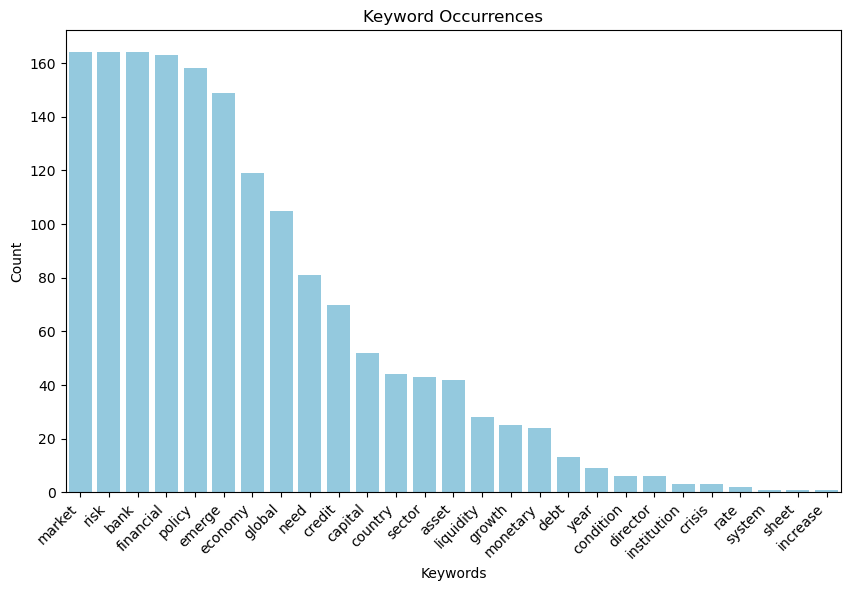

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=keyword_counts.index, y=keyword_counts.values, color='skyblue')
plt.title('Keyword Occurrences')
plt.xlabel('Keywords')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()